In [358]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

dataset_name = 'ytc'
all_files = glob.glob(os.path.join("../exp", dataset_name, "results_comparison_*.csv"))
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
#df = pd.read_csv('results.csv')}

In [359]:
df_accuracy = df.groupby(['methd', 'tau']).correct.mean().reset_index(drop=False)
df_payload = df.groupby(['tau']).payload_size.mean().reset_index(drop=False)

In [360]:
df_accuracy[df_accuracy.tau == 0]

,methd,tau,correct
0,CNT,0.0,0.666667
2,COS,0.0,1.000000
4,WNG,0.0,1.000000
6,WNG+COS,0.0,1.000000


In [361]:
import numpy as np
df_pivot = pd.pivot_table(df, values="correct", index="tau", columns="methd", aggfunc=np.mean)
df_pivot.T

tau,0.0,5.5
methd,,
CNT,0.666667,0.825000
COS,1.000000,0.950000
WNG,1.000000,0.991667
WNG+COS,1.000000,0.975000


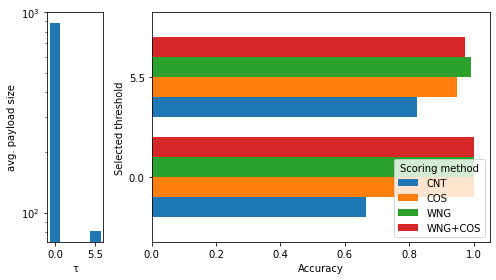

In [362]:
fig, (ax2, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 6]})
fig.set_figwidth(7)
df_pivot.plot.barh(ax=ax1, width=0.8) #(kind="bar")
#fig.set_size_inches(7, 6)
ax1.set_xlabel("Accuracy")
#ax1.set_xlim((0.9, 1.05))
ax1.set_ylabel("Selected threshold")
ax1.legend(title='Scoring method')

ax2.bar(df_payload.tau, df_payload.payload_size, tick_label=df_payload.tau, width=1.5)
ax2.set_yscale('log')
ax2.set_xlabel('τ')
ax2.set_ylabel('avg. payload size')

fig.tight_layout()

# Use this to show the plot in a new window
#plt.savefig(dataset_name + '_results_comparison.pdf')
plt.show()


In [363]:
df_pivot

methd,CNT,COS,WNG,WNG+COS
tau,,,,
0.0,0.666667,1.00,1.000000,1.000
5.5,0.825000,0.95,0.991667,0.975


In [364]:
df[df.correct == 0]

,methd,query_idx,size,tau,payload_size,correct
2,CNT,0,3,0.0,603,0
10,CNT,0,9,0.0,1358,0
26,CNT,0,3,5.5,83,0
30,CNT,0,6,5.5,114,0
68,COS,3,9,5.5,139,0
70,CNT,3,9,5.5,139,0
82,CNT,4,9,5.5,116,0
118,CNT,7,9,5.5,128,0
186,CNT,13,6,5.5,112,0
218,CNT,16,3,5.5,24,0
